--- 
#### 타이타닉 생존여부 예측 모델
---

1. 예측 모델 처리 순서
    - 목표 설정 : 가장 중요
    - 데이터 수집
    - 데이터 분석(시각화)
    - 데이터 전처리
    - 모델 학습
    - 모델 성능 평가 : 성능이 떨어지면 위로 다시 돌아가야 한다.

In [27]:
# 데이터 로드 및 기본 정보 확인
# 데이터집합 : train.csv, test.csv(사용하지 않는다)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv('./data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train_df=pd.read_csv('./data/data/train.csv')

In [34]:
# 데이터 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 데이터 크기(구조) 확인
train_df.shape

(891, 12)

##### 주요 컬럼 정리
- Survived(목표변수, 원래답) : 0(사망), 1(생존)
- Pclass(등급) : 1등석(1), 2등석(2), 3등석(3)
- Sex(성별) : male(남성), female(여성)
- Age(나이) : 데이터 타입 float, 실수다
  - 연속데이터다 => 범주형 변경 필요, 카테고리컬 데이터
- SibSp(형제/배우자 수) : 명수
- Parch(부모/자식 수) : 명수
- Cabin(방이름) : C001,D002,E
- Fare(티켓요금) : 
- Embarked(승선 항구) : C(Cherbourg) , Q(Queenstown), S(Southampton) 

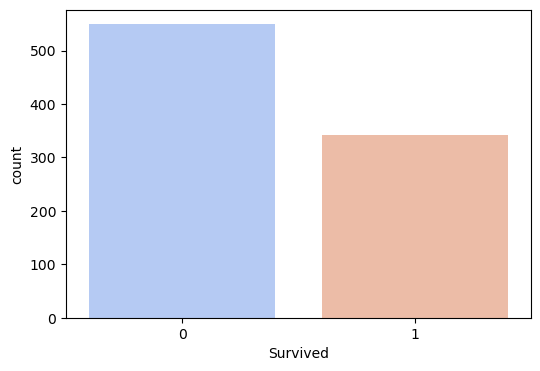

In [ ]:
# 탐색적 데이터 분석(EDA), 시각화
# 1. 생존자(목표변수) 비율 : 불균형 데이터 셋, 사망자가 60%이상 된다
plt.figure(figsize=(6,4))
sns.countplot(
    data=train_df
    , x='Survived'
    , palette='coolwarm'
)
plt.show()

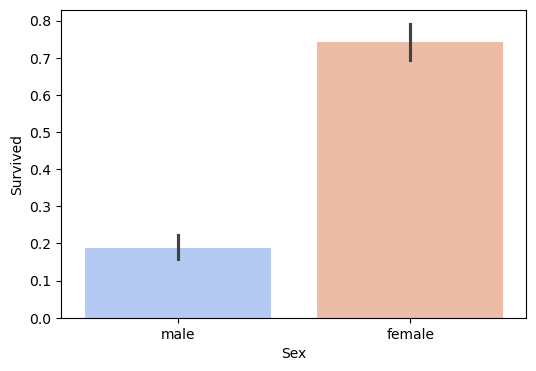

In [8]:
# 2. 성별과 생존 관계 시각화
plt.figure(figsize=(6,4))

sns.barplot(
    data=train_df
    , x='Sex'
    , y='Survived'
    , palette='coolwarm'
)

plt.show()

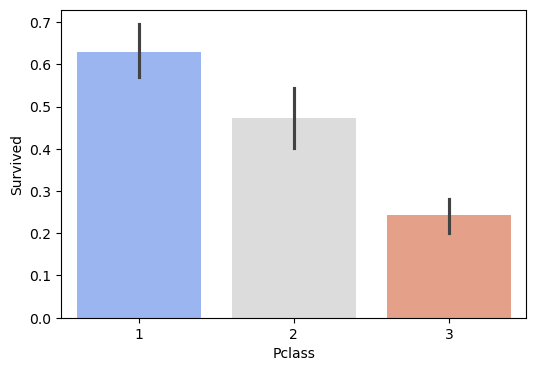

In [9]:
# 3. 등급과 생존 관계
# 2. 성별과 생존 관계 시각화
plt.figure(figsize=(6,4))

sns.barplot(
    data=train_df
    , x='Pclass'
    , y='Survived'
    , palette='coolwarm'
)

plt.show()

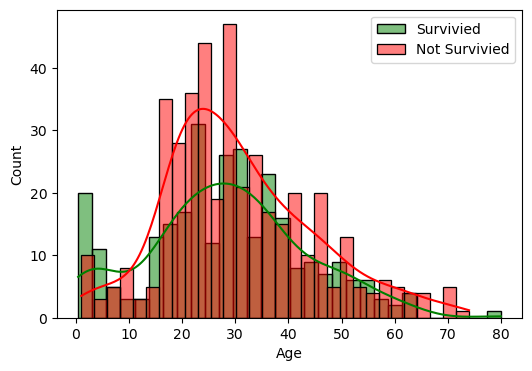

In [ ]:
# 4. 나이(연속데이터)와 생존 관계
# 히스토그램 
# 2. 성별과 생존 관계 시각화
plt.figure(figsize=(6,4))

# 생존 데이터 관련
sns.histplot(
    x=train_df[train_df['Survived']==1]['Age']
    , bins=30 # 30개 구간으로 나누고 밀도
    , color='green'
    , kde=True # 곡선 표시 여부
    , label='Survivied'
)
# 사망 데이터 관련
sns.histplot(
    x=train_df[train_df['Survived']==0]['Age']
    , bins=30 # 30개 구간으로 나누고 밀도
    , color='red'
    , kde=True # 곡선 표시 여부
    , label='Not Survivied'
)
plt.legend()
plt.show()

# 어린이(10세이하)의 생존율이 높음
# 20대~40대 성인 남성의 생존율이 낮음

---
#### 연속형 데이터를 범주형 데이터 변환
---

1. 왜 나이를 범주형 데이터로 변환하는가?
    - 연속형 데이터의 문제점
      - 나이는 0세부터 80세 이상까지 연속 값을 가지고 있는데, 특정 연령대가 생존율과 강한 연관성이 있더라도 머신러닝이 모델이 학습하기 어렵다
    - 분류 모델(결정트리, 랜덤포레스트, XGBoost 등)들은 연속형 값보다 범주형 변수를 학습 더 잘할 수 있다.
    - 장점
      - 이상치 데이터에 의한 학습 문제 완화 

In [ ]:
# 범주화 방법
# 1. 등간격 방법(Equal Interval) : 일정한 간격으로 나누는 방법(10대,20대,,,)
# 나이 구간을 5개로 나누기(0~16:0, 17~32:1, 33~48:2, 49~64:3, 65+:4)
# 장점 : 특정 구간에서 생존율이 비슷한지 비교가능
# 단점 : 데이터 분포에 상관없이 균등하게 나누므로, 특정 그룹이 너무 많거나 적을수 있다

age_bin=pd.cut(
    train_df['Age']
    , bins=[0,16,32,48,64,100]
    , labels=[0,1,2,3,4]
)
age_bin

0        1
1        2
2        1
3        2
4        2
      ... 
886      1
887      1
888    NaN
889      1
890      1
Name: Age, Length: 891, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [ ]:
# 2 분위수 기반(Quantile Binning) : 데이터를 동등한 개수의 그룹으로 나누는 방법
# 해석
# 1사분위 : (최소~25%) : 0
# 2사분위 : (25%~50%) : 1
# 3사분위 : (50%~75%)) : 2
# 4사분위 : (75%~최대) : 3
# 장점 : 각 그룹에 데이터가 균등하게 분포되도록 나뉘므로 데이터 불균형을 방지
# 단점 : 나이의 의미적 구분이 불분명할 수 있다다
age_bin=pd.qcut(
    train_df['Age']
    , q=4 # 4분위
    , labels=[0,1,2,3]
)
age_bin


0        1
1        2
2        1
3        2
4        2
      ... 
886      1
887      0
888    NaN
889      1
890      2
Name: Age, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [ ]:
# 3. 의미 기반 그룹화(도메인 지식 활용) : 연령대를 실제 생존율 팬턴에 맞춰 직접 지정
# 10대, 20대 
# 장점 : 실제 생존율 패턴과 관련이 있는 연령대 구분
# 단점 : 성능이 떨어질 수 있다다
age_bin=train_df['Age'].apply(
    lambda x: 0 if x <= 10 else
              1 if x <= 20 else
              2 if x <= 30 else
              3 if x <= 40 else
              4 if x <= 50 else
              5 if x <= 60 else
              6 
              
)
age_bin


0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    6
889    2
890    3
Name: Age, Length: 891, dtype: int64

##### 결론 및 정리

1. 언제 범주형 변환을 사용할까?
    - 결정트리기반 모델(Random Forest, XGBoost)에서는 범주형 변환이 유용할 수 있다
    - 데이터가 비선형 관계일 경우, 연속형보다 범주형 변수가 성능이 더 좋을 수 있다
    - 데이터가 적거나 이상치가 많을 때 범주화하면 안정적인 학습이 가능
2. 어떤 상황에서 어떤 방법이 좋을지?
    - 데이터가 충분히 많다면 분위수 변환(qcut)이 일반적으로 성능이 좋다
    - 의미적인 구분이 필요하다면 도메인 지식 기반 그룹화 더 직관적일 수 있다
    - 기본적으로는 등간격  변환 후 다른 방식의 성능 비교하는 방식으로 추천천

---
#### 데이터 종류
---

데이터 크게 두 가지로 구분된다

1. 질적 데이터 (Qualitive Data, 범주형데이터) => 수치화할 수 없는 데이터 
2. 양적 데이터(Quantitative Data, 수치형데이터) =>수치로 측정되는 데이터

- 각각의 세부 유형과 특징 
      - 질적데이터
         - 명목형(Nominal) `: 순서가 없다

           - 예시 : 성별, 혈액형, 국적
           - 분석방법 : 빈도 분석, 카이제곱검정(범주형 데이터 간의 관계를 검정)

         - 서열형(ordinal) : 순서가 있는 명목형 데이터
           - 예시 : 고객만족도, 학점
           - 분석방법 : 중앙값 분석, 순위 상관 분석

      - 양적데이터 : 수치데이터
           - 이산형데이터(Discrete) : 
             - 예시 : 고객 방문 횟수(1,2,3), 자녀수
             - 분석방법 : 평균, 분산, 포아송분포 
             
           - 연속형 데이터 (continuous)
             - 예시 : 키, 몸무게, 온도
             - 분석방법 : 편균, 표준편차(STD), 정규분포
              





In [1]:
# 2. 질적데이터(범주형 데이터)의 통계적 접근 방법
# 질적데이터는 숫자로 연산할 수 없기 때문에 비율, 빈도 분석이 핵심이다
# 2.1 명목형 데이터 (nominal)
# 대이터 간 순서가 없으며, 단순히 범주를 나타낸다
# 빈도분석(frequency analysis) : 각범주의 개수를 비교해서 분포를 파악
# 성별 빈도 분석 
import numpy as np
import pandas as pd

data=pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Male']
})
# 빈도 분석
print(data['Gender'].value_counts())


Gender
Male      3
Female    2
Name: count, dtype: int64


In [3]:
#파이제곱 검정(chi - square test)
# 점주형 데이터 간의 관계를 검정(의미가 있냐 없냐냐)할 때 사용
# 예 : 성별과 생존 여부 관계 검정
from scipy.stats import chi2_contingency

# 성별과 생존 여부 교차표
# data=np.array
# ([[50,100] : 남성의 생존, 사망
# [100,70]]) : 여성의 생존, 사망

data=np.array([[50,100][100,70]]) 
chi2, p, _, _ =chi2_contingency(data)
print(f'p-value : {p}')

<>:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\jh\AppData\Local\Temp\ipykernel_25436\2895100820.py:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  data=np.array([[50,100][100,70]])
C:\Users\jh\AppData\Local\Temp\ipykernel_25436\2895100820.py:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  data=np.array([[50,100][100,70]])
C:\Users\jh\AppData\Local\Temp\ipykernel_25436\2895100820.py:11: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  data=np.array([[50,100][100,70]])


TypeError: list indices must be integers or slices, not tuple

In [4]:
# 2. 서형영 데이터 (ordinal)
# 데이터가 순서는 있지만 간격이 일정하지 않은 데이터
# 중앙값(median) 분석 
# 목적 : 평균을 사용하기 어려울때 
data=np.array([1,2,3,4,5]) # 1.불만족, 5.매우만족
np.median(data)

np.float64(3.0)

In [8]:
#고객만족도(서열) 재궁매(서열)의 상관관계 분석 
# 서열데이터 간의 상관관계를 분석하는 방법
# 스피어만 순위 상관 분석 (spearman's rank correlation)

# data 생성
x=[1,2,3,2,1] #만족도 => p-value : 0.013846832988859107
x=[1,2,3,4,5] #만족도 => p-value : 0.6238376647810728
y=[10,20,30,25,15] #재구매

from scipy.stats import spearmanr
corr, p=spearmanr(x,y)
# p-vvalue < 0.05  재무개율이 높다
print(f'spearman Correlation : {corr}, p-value : {p}')



spearman Correlation : 0.3, p-value : 0.6238376647810728


In [9]:
# 양적 데이터 (수치)의 통계적 접근 방법 
# 양적데이터는 평균, 분산, 회귀분석 등을 활용하여 분석 
# 3.1 이산데이터 (discrete data)
# 보통 정수값만 가짐
# 평균, 분산 분석
data=np.array([2,3,5,7,1,0,4])
print(f'평균 : {np.mean(data)} 분산 : {np.var(data)}')
# 분산이 크면 데이터 값들을 평균에서 많이 벗어나 있다는 의미
# 머신러닝, 딥러닝에서 데이터가 크면 학습 잘 안되거나 발산발생


평균 : 3.142857142857143 분산 : 4.979591836734694


In [11]:
# 포아솔 분포(함수) : 특정 시간 동안 발생하는 이벤트 횟수 예측
# 예 : 1시간동안 고객 방문자 수 예측
import scipy.stats as stats
mu=3  #모집단(전체데이터) 평균 방문횟수
data=[0,1,2,3,4,5] #데이터
poisson_dist=stats.poisson.pmf(data, mu)
print(poisson_dist)


[0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881]


In [12]:
# 3.2 연속형 데이터 (continuous data)
# 소수점 포함
# 평균, 분산, 표준편차 : 크면 데이터가 평균으로부터 넓게 퍼져있는 것을 의미
# 학습이 잘 안된다
data=np.array([170,165,180,175,160])
print(f'평균 : {np.mean(data)}, 표준편차 : {np.std(data)}, 분산 : {np.var(data)}')

평균 : 170.0, 표준편차 : 7.0710678118654755, 분산 : 50.0


In [14]:
# 정규분포 검정 : 데이터가 정규분포를 따르는지 안따르는지 여부
from scipy.stats import shapiro

data=np.random.normal(0,1,100) #평균:0, 표준편차:1 100개 데이터 생성
stat, p=shapiro(data)
print(f'p-value : {p}')
# p-value 가 0.05 이면 데이터가 정규분포를 따르지 않음을 의미 
# : 머신러닝은 데이터가 정규분포를 따르지 않음을 알 수 있음
# 머신러닝은 데이터가 정규분포를 따른다라는 가정하에 알고리즘들이 만들어져있다
# 결국데이터가 정규분포를 따르지 않으면 머신러닝 학습은 제대로 되지 않음
# 딥러닝은 조금 틀림림



p-value : 0.31096119843922987


---
#### 결론
---

1. 질적 데이터(명목형 서열형) : 카이제곱 검정, 빈도분석, 순위상관분석 활용
2. 양적 데이터(이산, 연속) : 평균, 분산, 정규성 검정, 회귀분성 등 활용
3. 데이터 유형에 따라 적절한 통계적 접근 방법을 선택해야 한다


---
#### 결측치 처리
---
결측치(missing value)는 머신러닝 모델의 성능을 크게 저하시킬 수 있기 때문에,
절절한 방법으로 처리해야한다

 - 타이타닉 데이터 결측치 확인
 - 결측치 처리 방법 


In [39]:
# 타이타닉 데이터에서 결측치 확인
# 데이터 로딩
train_df=pd.read_csv('./data/data/train')


FileNotFoundError: [Errno 2] No such file or directory: './data/data/train'

In [37]:
# 결측치 확인
missing_values=train_df.isnull().sum()/891
missing_values

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [18]:
# 결측치 시각화 
import missingno as msno


In [36]:
msno.matris(train_df)
# msno.bar()

AttributeError: module 'missingno' has no attribute 'matris'

<Axes: >

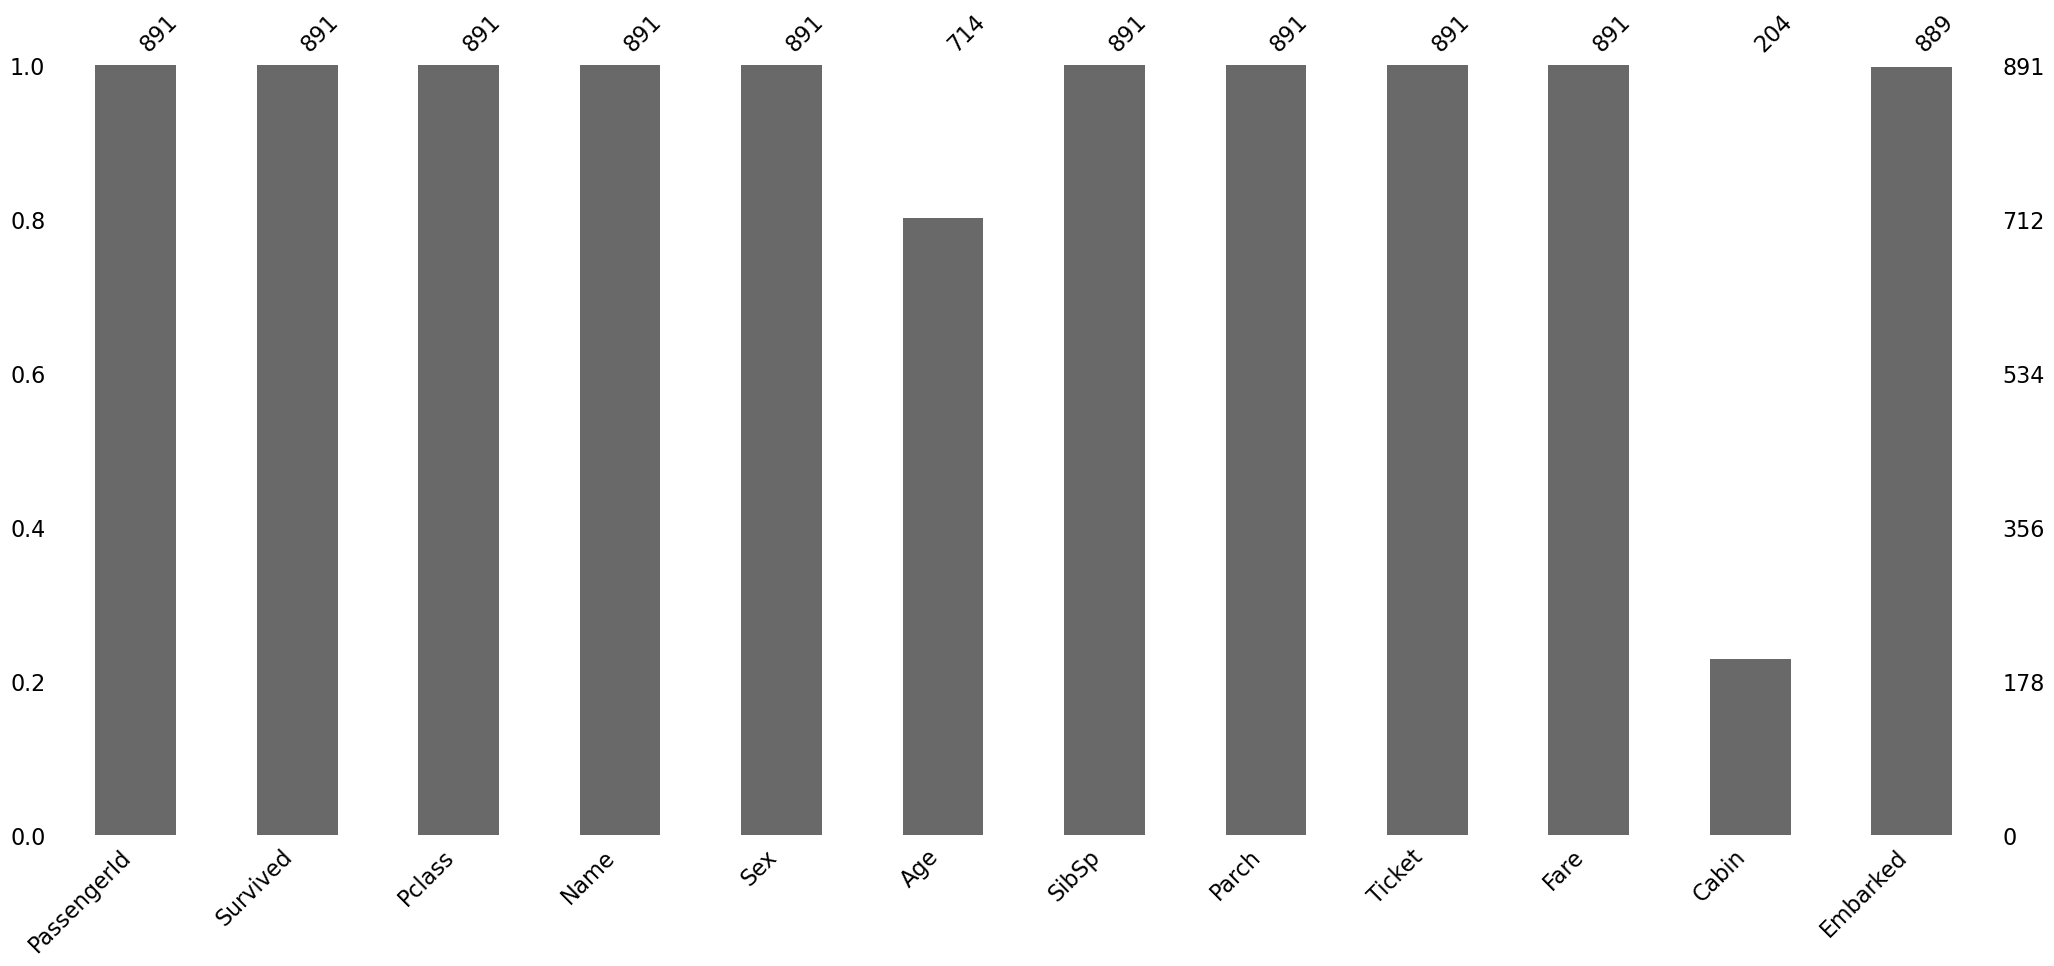

In [35]:
msno.bar(train_df)

In [ ]:
# 2.결측치 처리 방법
# 결칙치 비율 
# 5% 이하 : 평균값, 동일값 으로 대체
# 5% ~ 30% : 특정(컬럼) 그룹별 평균값, 통일값으로 대체
# 30% 이상 : 삭제하거나 새로운 범주 생성(예 : cabin 의 경우 'no cabin' 추가)


In [40]:
# 나이(age) 결측치 처리
# 방법 1 : 전체 평균 또는 중앙값으로 대체
# 장점 : 빠르고 간단한 방법
# 단점 : 데이터 분포를 왜곡할 수 있다
# 전체 형균으로 대체 
train_df['Age'].fillna(train_df['Age'].mean(), inplace=False).isnull().sum()
# 전체중위값으로 대체체 
train_df['Age'].fillna(train_df['Age'].median(), inplace=False).isnull().sum()

np.int64(0)

---
#### 판다스 groupby() function
---

groupby 함수는 데이터 프레임에서 특정 기준으로 데이터를 그룹화하고,
그룹별 연산을 수행할 수 있는 핵심 기능

- 기본 문법 
    df.groupby('그룹핑할 컬럼').연산()
    - 연산 : sum(), mean(), count(), filter()
    


In [41]:
# 예제 데이터 생성 
data = {
    "부서": ["영업", "영업", "마케팅", "마케팅", "인사", "인사", "인사"],
    "직원": ["김철수", "이영희", "박민수", "최지훈", "한지수", "정해인", "오세훈"],
    "급여": [500, 550, 620, 700, 450, 480, 500],
    "보너스": [50, 55, 60, 70, 45, 48, 50]
}
df = pd.DataFrame(data)
print(df)
# 방법2. pclass 컬럼별 평균 나이를 구하고 대체 



    부서   직원   급여  보너스
0   영업  김철수  500   50
1   영업  이영희  550   55
2  마케팅  박민수  620   60
3  마케팅  최지훈  700   70
4   인사  한지수  450   45
5   인사  정해인  480   48
6   인사  오세훈  500   50


In [45]:
# 요건 : 부서별 급여 합
df.groupby('부서').sum()['급여'] # 부서별 그룹핑 오브젝트
df.groupby('부서')['급여'].sum() # 더 빠른부서별 그룹핑 오브젝트

부서
마케팅    1320
영업     1050
인사     1430
Name: 급여, dtype: int64

In [46]:
# 부서별 평균급여 
df.groupby('부서')['급여'].mean()

부서
마케팅    660.000000
영업     525.000000
인사     476.666667
Name: 급여, dtype: float64

In [47]:
# 부서별 사원수
df.groupby('부서')['급여'].count()

부서
마케팅    2
영업     2
인사     3
Name: 급여, dtype: int64

In [48]:
# 여러개 집계함수 적용(sum, mean, count)
# 부서별 급여합, 급여평균, 사원수수
df.groupby('부서')['급여'].agg(['sum','mean','count'])

,sum,mean,count
부서,,,
마케팅,1320,660.000000,2
영업,1050,525.000000,2
인사,1430,476.666667,3


In [49]:
# 다중 컬럼으로 그룹핑 
df.groupby(['부서','직원'])[['급여','보너스']].sum()

급여  보너스
부서  직원           
마케팅 박민수  620   60
    최지훈  700   70
영업  김철수  500   50
    이영희  550   55
인사  오세훈  500   50
    정해인  480   48
    한지수  450   45

In [51]:
# 인덱스(부서)를 컬럼으로 보내기
df.groupby('부서')[['급여','보너스']].sum().reset_index()

,부서,급여,보너스
0,마케팅,1320,130
1,영업,1050,105
2,인사,1430,143


In [53]:
# 그룹별 필터링(filter)
# 턱정 조건을 만족하는 그룹만 선택
# 부서별 급여의 평균이 500이상인 부서와 데이터 출력
# df.groupby('부서')['급여'].mean()
# x : dataframegroupby object 
df.groupby('부서').filter(lambda x:x['급여'].mean() > 500)



,부서,직원,급여,보너스
0,영업,김철수,500,50
1,영업,이영희,550,55
2,마케팅,박민수,620,60
3,마케팅,최지훈,700,70


In [54]:
# 그룹별 변환(transform())
df['급여_평균']=df.groupby('부서')['급여'].transform('mean')
df

,부서,직원,급여,보너스,급여_평균
0,영업,김철수,500,50,525.000000
1,영업,이영희,550,55,525.000000
2,마케팅,박민수,620,60,660.000000
3,마케팅,최지훈,700,70,660.000000
4,인사,한지수,450,45,476.666667
5,인사,정해인,480,48,476.666667
6,인사,오세훈,500,50,476.666667


In [55]:
# 그룹별 사용자 정의 함수 적용(apply())
# 요건 : 부서별 최대 급여와 최소급여의 차이 (빼기)
df.groupby('부서')['급여'].apply(lambda x:x.max()-x.min())


부서
마케팅    80
영업     50
인사     50
Name: 급여, dtype: int64

In [57]:
# 결측치 대체 : fillna()
# 방법2. pclass 별 평균 나이로 대체
train_age = \
    train_df.groupby('Pclass')['Age'].transform(lambda x:x.fillna(x.mean()))
train_age.isnull().sum()


np.int64(0)

In [ ]:
# 방법3. 머신러닝 알고리즘을 이용해서 결측치값을 예측하고 대체
# 장점 : 데이터 패턴을 학습하여 더 정밀한 값으로 대체 모델의 성능 향상 기대 가능
# 단점 : 시간이 걸린다, 반드시 성능이 향상됨을 기대하면 안됨
# age 를 예측하는 모델을 만들어서 결측값을 채울수 있다
# randomforest  (분류, 회귀(나이: 연속값))
from sklearn.ensemble import RandomForestRegressor

# 나이 예측에 필요한 컬럼(변수, 피쳐) 선택 
age_data=train_df[['Age','Pclass','SibSp','Parch','Fare']]
age_data.head()
age_data.shape

(891, 5)

In [ ]:
# 결측치가 없는 행 : 학습데이터로 사용, 결측치 행 삭제해서 추출 : dropna()
# 학습에 사용될 데이터 
train_no_missing=age_data.dropna() #결측치를 상게
train_no_missing.shape #결측치가 아닌 

 
# 결측치가 있는 행 : 예측나이를 추출할 떄 사용 : drop() 삭제한걸 반환
# 결측치가 있는 행을 찾자 : boolean
# 나이 예측에 사용할 데이터 => 대체 
train_missing = age_data[age_data['Age'].isnull()].drop('Age', axis=1)
train_missing.shape
# age_data['Age'].isnull()


(177, 4)

In [71]:
# 학습데이터 데이터(4개 컬럼)와 답(나이)으로 분리 
# 데이터 : X (집합)
X_train=train_no_missing.drop('Age', axis=1, inplace=False) #삭제하고 나머지 반환

# 답(나이컬럼)추출 => 소문자는 백터
y_train=train_no_missing['Age']

# 모델 생성
model=RandomForestRegressor(n_estimators=100, random_state=42)

# 학습 끝나면 모델(오차가 최소가 되는 식) 완성
model.fit(X_train, y_train)

# 나이의 결측치를 제출 예측나이 추출 대체
# 예측
# 
train_df.loc[train_df['Age'].isnull(), 'Age']=model.predict(train_missing)

 

<Axes: >

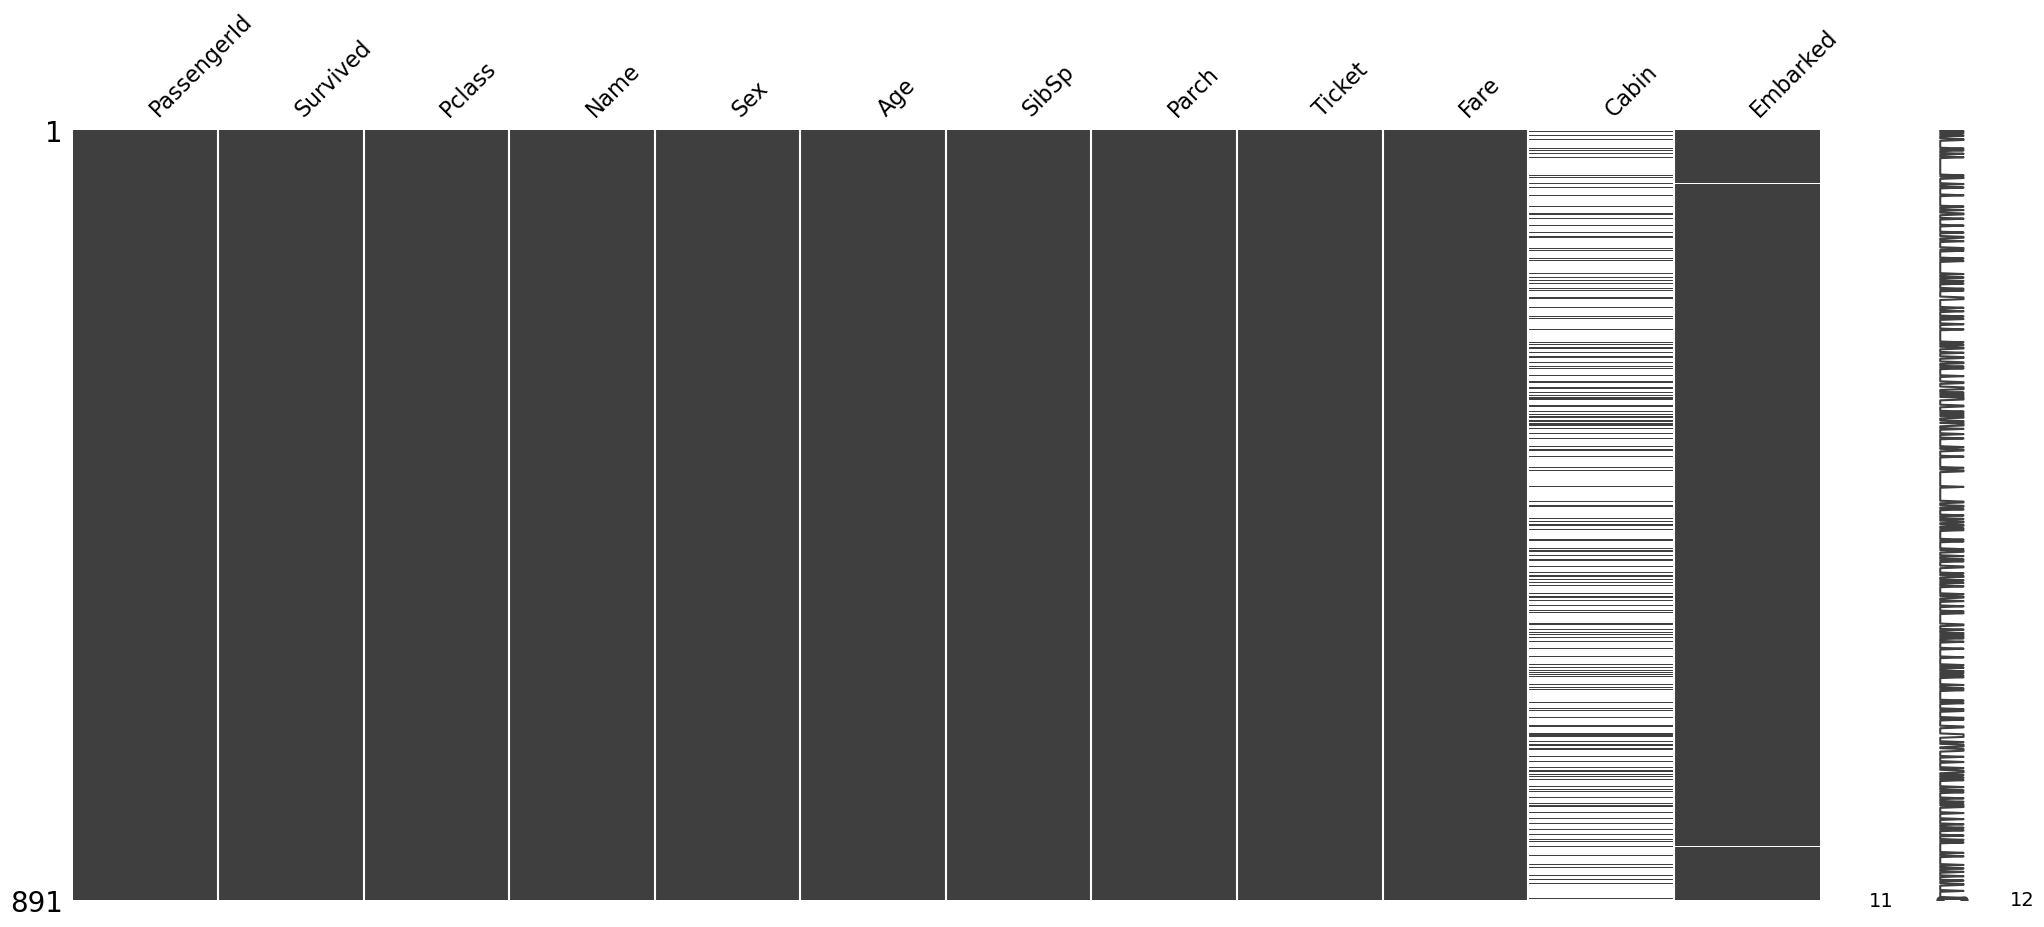

In [72]:
msno.matrix(train_df)

In [ ]:
# 4. Cabin  결측치 처리
# 결측치가 80% 정도된다 , 새로운 변수를 만드는 방식으로 
# 결측치를 'No'로 채워라라
train_df['Cabin']=train_df['Cabin'].fillna('No')
mxno.matrix(train_df)

In [75]:
train_df[train_df['Cabin'].notnull()]['Cabin']

0        No
1       C85
2        No
3      C123
4        No
       ... 
886      No
887     B42
888      No
889    C148
890      No
Name: Cabin, Length: 891, dtype: object

In [ ]:
# embarked(승선 항구명) 결측치 정리 
# 결측지가 2개뿐이므로 가장 많이 등장하는 항구로 대체
# 최빈값 구하자
train_df['Embarked'].mode() #series object 다 
most_common_embarked=train_df['Embarked'].mode()[0] # 0번 인덱스 가져오란뜻뜻
train_df['Embarked'].fillna(most_common_embarked)

train_df.groupby('Embarked')['Embarked'].count()
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

---
#### 결론
---

결측치 처리는 모델의 성능에 중요한 영향을 미친다.

여러 방법을 시도하고 모델 성능을 비교하는 것이 중요하다

--- 
#### seaborn facetgrid : 강력한 시각화 도구
---

1. 연속형 데이터의 범주형 변환에 도움


In [80]:
import seaborn as sns

import matplotlib.pyplot as plt

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [81]:
import seaborn as sns

import matplotlib.pyplot as plt

# 타이타닉 데이터 불러오기
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


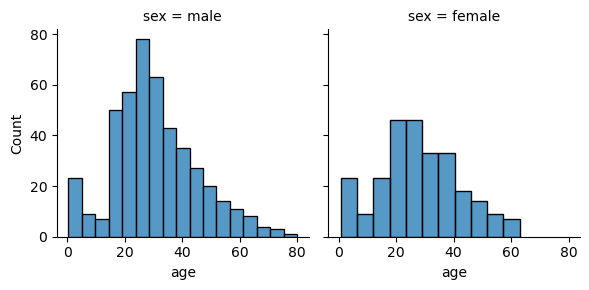

In [ ]:
# 성별 나이 분포 시각화
g=sns.FacetGrid(
    data=titanic
    , col='sex'
)
# 히스토그램 적용
g.map(
    sns.histplot  #히스토그램 적용
    , 'age'
)
plt.show()
# 해석 
# 남성과 여성의 나이 분포 확인
# 여성의 경우, 특정 연령대에 많이 분포하는 패턴이 보인다다

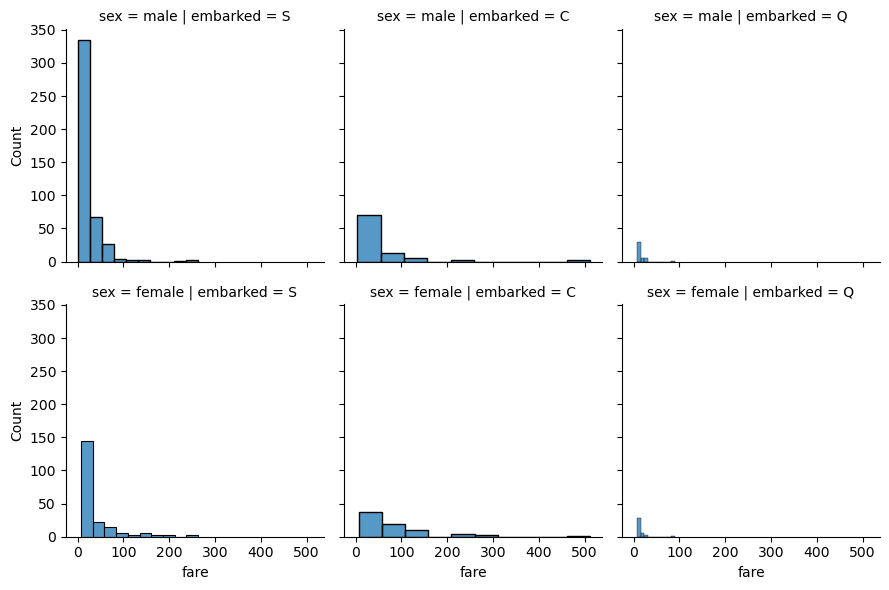

In [86]:
# 주요 옵션
# row, col
# 성별, 승선항구에 따른 비용 분포(histplot)
g=sns.FacetGrid(titanic, row='sex', col='embarked')
g.map(sns.histplot, 'fare', bins=10)
plt.show()

In [87]:
titanic['fare'].max(), titanic['fare'].min()

(512.3292, 0.0)

<Figure size 600x400 with 0 Axes>

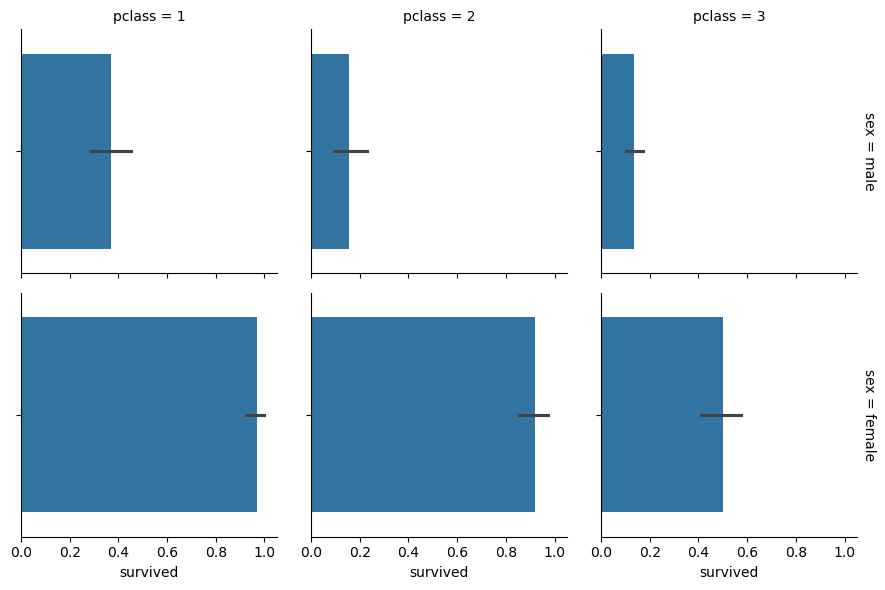

In [94]:
# 요건 : 성별 , 등급에 따른 생존률 비교
plt.figure(figsize=(6,4))
g=sns.FacetGrid(titanic, col='pclass', row='sex', margin_titles=True)
g.map(sns.barplot, 'survived')
plt.show()

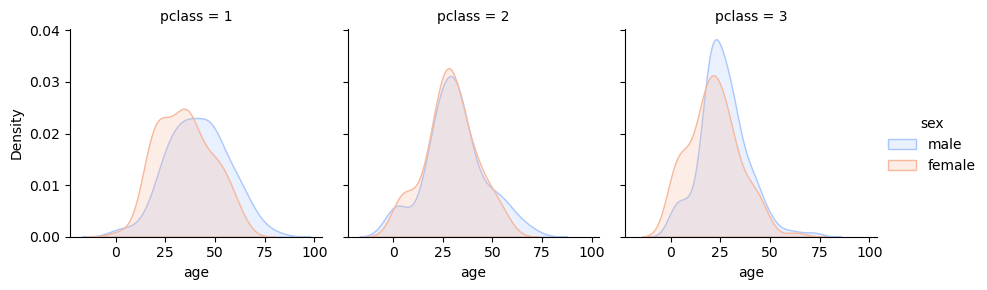

In [96]:
# hue를 사용한 색상 구분 
# 한 그래프에서 두 개의 그룹을 구분할 수 있게 한다
g=sns.FacetGrid(titanic,col='pclass', hue='sex', palette='coolwarm')
g.map(sns.kdeplot, 'age', fill=True)
g.add_legend()
plt.show()

In [ ]:
# 범주형 : 확률질량함수
# pdf 

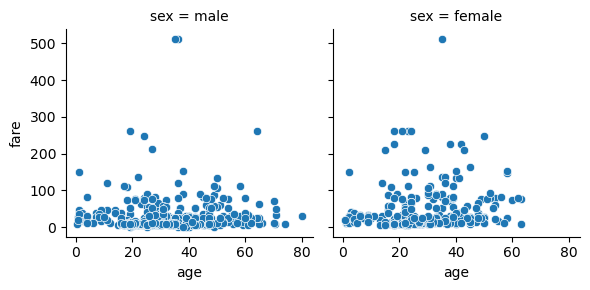

In [99]:
# 다양한 차트 적용
# scatterplot : 산정도
g=sns.FacetGrid(titanic,col='sex')
g.map(sns.scatterplot, 'age', 'fare')
plt.show()

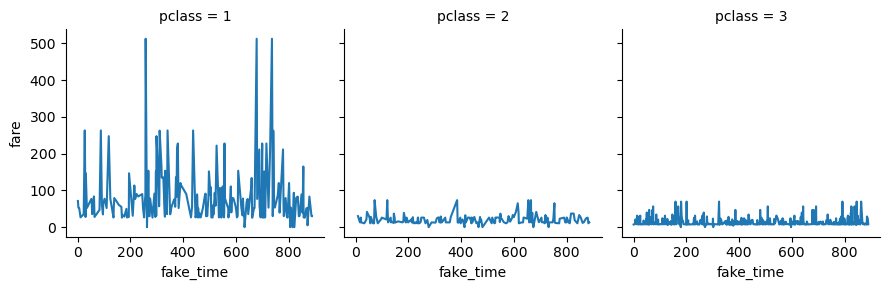

In [97]:
# 가상의 시간데이터 생성 
titanic['fake_time']=np.arange(len(titanic))
g=sns.FacetGrid(titanic,col='pclass')
g.map(sns.lineplot, 'fake_time', 'fare')
plt.show()

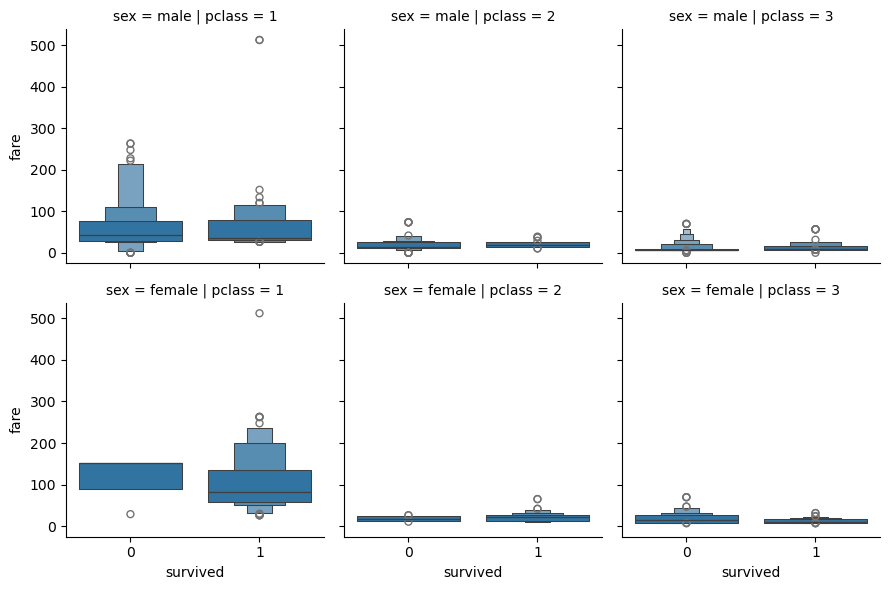

In [ ]:
# boxplot 
# 생존률과 비용 관계 분석석
g=sns.FacetGrid(titanic, col='pclass', row='sex')
g.map(sns.boxenplot, 'survived','fare') #boxplot 은 이상치 검출할때사용
plt.show()